### Introduction

In [92]:
# load library
import xml.etree.ElementTree as ET
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter # frequency table
from lxml import etree # xml can not works for logical or/and/not, try other packages
# read output.xml
# total 1202 paper
tree1 = ET.parse('output_1202 copy.xml')
root1 = tree1.getroot()
# read dataset again
root11 = etree.parse("output_1202 copy.xml")
root33 = etree.parse("output_23.xml")

In [41]:
root01 = etree.parse("output_01.xml")
root02 = etree.parse("output_02.xml")
root03 = etree.parse("output_03.xml")
root04 = etree.parse("output_04.xml")
root05 = etree.parse("output_05.xml")
root06 = etree.parse("output_06.xml")
root07 = etree.parse("output_07.xml")
root08 = etree.parse("output_08.xml")
root09 = etree.parse("output_09.xml")
root10 = etree.parse("output_10.xml")
root11 = etree.parse("output_11.xml")
root12 = etree.parse("output_12.xml")


Find IDs we want:
1. alikisren
2. drug
2.1 related drug(aliskiren)
2.2 unrelated drug(aliskiren)
3. sysmptom

In [52]:
# function: draw histogram plot
def histo(data):
    counts = Counter(data)
    labels,values = zip(*counts.items())
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels,rotation=90)
    plt.grid(True)
    plt.show()

In [82]:
# find id for aliskiren
# 5246
id_ali = []
for Utterance in root11.xpath("//Utterance/Entity[@name='aliskiren']"):
    id = Utterance.get('id')
    id_ali.append(id)
print(len(id_ali))

5246


778


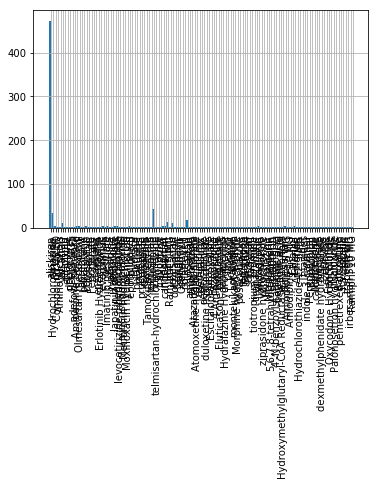

Counter({'aliskiren': 473, 'Amlodipine': 42, 'Hydrochlorothiazide': 33, 'Losartan': 17, 'Ramipril': 14, 'valsartan': 11, 'irbesartan': 10, 'Licorice': 5, 'everolimus': 4, 'DELIVER': 3, 'Amlodipine Besylate': 3, 'Olmesartan medoxomil': 3, 'bortezomib': 3, 'Imatinib mesylate': 3, 'lapatinib ditosylate': 3, 'lenalidomide': 3, 'Paclitaxel': 3, 'imidaprilat': 3, 'candesartan': 3, 'Vildagliptin': 3, 'olmesartan': 3, 'Compound 48-80': 2, 'etravirine': 2, 'clopidogrel': 2, 'aprepitant': 2, 'bosentan': 2, 'ixabepilone': 2, 'levocetirizine dihydrochloride': 2, 'Metformin hydrochloride': 2, 'prucalopride': 2, 'sorafenib': 2, 'telmisartan': 2, 'tipifarnib': 2, 'aripiprazole': 2, 'Atazanavir sulfate': 2, 'Escitalopram oxalate': 2, 'Eszopiclone': 2, 'lopinavir': 2, 'posaconazole': 2, 'Nitroglycerin': 2, 'Hydroxymethylglutaryl-CoA Reductase Inhibitors': 2, 'Amlodipine 5 MG': 2, 'Amlodipine 10 MG': 2, 'Amiloride': 2, 'Hydrochlorothiazide 12.5 MG': 2, 'Thiazides': 2, 'indole-3-carbinol': 2, 'succinate'

In [21]:
# find id for drug
# 9054
id_drug = []
name_drug = []
for Utterance in root11.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
    id = Utterance.get('id')
    id_drug.append(id)
    name = Utterance.get('name')
    name_drug.append(name)
print(len(id_drug))

# draw histogram plot for its name
histo(name_drug)

# print outcome
counts = Counter(name_drug)
print(counts)

In [7]:
# find id for: aliskiren & related drug
alis_reldrug_type = []
id_alis_reldrug = []
id_reldrug_alis = []
count = 0
for entity in root01.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count: 0 D30312501.E35 D30312501.E40
D30312501.E35 D30312501.E41
D30312501.E35 D30312501.E43
count: 100 D29331564.E50 D29331564.E51
D29331564.E75 D29331564.E74
D29331564.E89 D29331564.E88
D29191768.E72 D29191768.E73
D29172824.E57 D29172824.E51
D29172824.E57 D29172824.E51
count: 200 D28724547.E20 D28724547.E24
count: 300 D28228402.E72 D28228402.E66
D28228402.E72 D28228402.E68


In [10]:
count = 0
for entity in root02.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count: 0 D27612855.E102 D27612855.E105
D27612855.E102 D27612855.E105
count: 100 count: 200 D26644935.E108 D26644935.E103
count: 300 D26501147.E14 D26501147.E16
D26501147.E76 D26501147.E84
D26465969.E6 D26465969.E5


In [13]:
count = 0
for entity in root03.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)
count = 0
for entity in root04.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)
count = 0
for entity in root05.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count = 0
for entity in root06.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)   

count = 0
for entity in root07.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count = 0
for entity in root08.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)
            

count = 0
for entity in root09.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count = 0
for entity in root10.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count = 0
for entity in root11.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)
            

count = 0
for entity in root12.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_drug)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_drug)
            auxtype = pred.get('type')
            alis_reldrug_type.append(auxtype)
            id_alis_reldrug.append(id_drug)
            id_reldrug_alis.append(id_ali)

count: 0 D18391092.E2 D18391092.E5
D18391092.E63 D18391092.E65
D18391092.E118 D18391092.E119
D18300872.E17 D18300872.E19
D18300872.E17 D18300872.E20
D18300872.E62 D18300872.E74
count: 100 D18234150.E5 D18234150.E6
D18234150.E5 D18234150.E7
D18234150.E5 D18234150.E8
D18234150.E25 D18234150.E31
D19337534.E56 D19337534.E58
D18090068.E68 D18090068.E72
count: 200 D17945530.E79 D17945530.E81
D17945530.E79 D17945530.E81
D17702736.E37 D17702736.E38
D17700383.E51 D17700383.E60
D17700383.E51 D17700383.E61
D17700383.E51 D17700383.E62
count: 300 D17655373.E114 D17655373.E111
D17578167.E89 D17578167.E93
count: 400 D17198906.E88 D17198906.E96
D17143194.E37 D17143194.E35
D17143194.E37 D17143194.E38
D17073832.E3 D17073832.E10
D17073832.E3 D17073832.E11
D17073832.E3 D17073832.E12
D17073832.E3 D17073832.E13
count: 500 count: 0 D16300168.E5 D16300168.E6
D16300168.E5 D16300168.E7
D16300168.E5 D16300168.E8
D16300168.E5 D16300168.E9
D16103264.E24 D16103264.E27
D22496673.E65 D22496673.E68
D22496673.E65 D2249

In [68]:
# find rel_drug names
name_alis_reldrug = []
for id in id_alis_reldrug:
    xpath_druid = "./Document/Utterance/Entity[@id ='"+id+"']"
    for entity in root11.xpath(xpath_druid):
        aux = entity.get('name')
        name_alis_reldrug.append(aux)

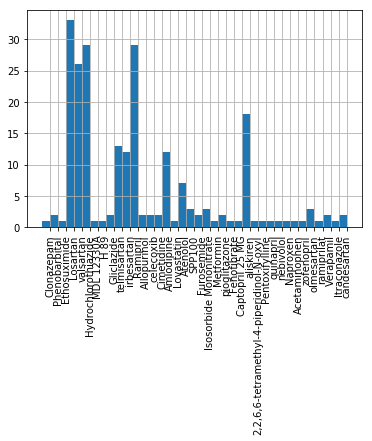

In [69]:
histo(name_alis_reldrug)

In [89]:
counts = Counter(name_alis_reldrug)
print(counts)

Counter({'Losartan': 33, 'Hydrochlorothiazide': 29, 'Ramipril': 29, 'valsartan': 26, 'aliskiren': 18, 'telmisartan': 13, 'irbesartan': 12, 'Amlodipine': 12, 'Atenolol': 7, 'SPP100': 3, 'Isosorbide Mononitrate': 3, 'olmesartan': 3, 'Phenobarbital': 2, 'Gliclazide': 2, 'Allopurinol': 2, 'celecoxib': 2, 'Cimetidine': 2, 'Furosemide': 2, 'pioglitazone': 2, 'Verapamil': 2, 'candesartan': 2, 'Clonazepam': 1, 'Ethosuximide': 1, 'MDL 12330A': 1, 'H 89': 1, 'Lovastatin': 1, 'Metformin': 1, 'Fenofibrate': 1, 'Captopril 25 MG': 1, '2,2,6,6-tetramethyl-4-piperidinol-N-oxyl': 1, 'Pentoxifylline': 1, 'quinapril': 1, 'nebivolol': 1, 'Naproxen': 1, 'Acetaminophen': 1, 'zofenopril': 1, 'ramiprilat': 1, 'Itraconazole': 1})


In [ ]:
type(id_drug)

In [1]:
# find id for: unrelated drug
# 302
aux = list(set(id_drug) - set(id_alis_reldrug))
id_unreldrug = list(set(aux)- set(id_ali))

NameError: name 'id_drug' is not defined

In [85]:
# find unrel_drug names
name_alis_unreldrug = []
for id in id_unreldrug:
    xpath_undruid = "./Document/Utterance/Entity[@id ='"+id+"']"
    for entity in root11.xpath(xpath_undruid):
        aux = entity.get('name')
        name_alis_unreldrug.append(aux)

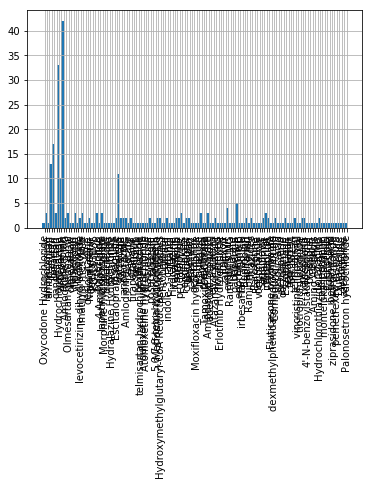

In [86]:
histo(name_alis_unreldrug)

In [88]:
counts = Counter(name_alis_unreldrug)
print(counts)

Counter({'Amlodipine': 42, 'Hydrochlorothiazide': 33, 'Losartan': 17, 'Ramipril': 13, 'valsartan': 11, 'irbesartan': 10, 'Licorice': 5, 'everolimus': 4, 'lenalidomide': 3, 'candesartan': 3, 'Olmesartan medoxomil': 3, 'Vildagliptin': 3, 'Imatinib mesylate': 3, 'bortezomib': 3, 'lapatinib ditosylate': 3, 'DELIVER': 3, 'Paclitaxel': 3, 'Amlodipine Besylate': 3, 'imidaprilat': 3, 'Amlodipine 5 MG': 2, 'levocetirizine dihydrochloride': 2, 'Nitroglycerin': 2, 'Escitalopram oxalate': 2, 'succinate': 2, 'aripiprazole': 2, 'Amlodipine 10 MG': 2, 'lopinavir': 2, 'posaconazole': 2, 'Metformin hydrochloride': 2, 'Hydroxymethylglutaryl-CoA Reductase Inhibitors': 2, 'indole-3-carbinol': 2, 'sorafenib': 2, 'prucalopride': 2, 'clopidogrel': 2, 'bosentan': 2, 'Atazanavir sulfate': 2, 'tipifarnib': 2, 'Thiazides': 2, 'etravirine': 2, 'Amiloride': 2, 'Compound 48-80': 2, 'Eszopiclone': 2, 'telmisartan': 2, 'aprepitant': 2, 'ixabepilone': 2, 'Hydrochlorothiazide 12.5 MG': 2, 'Oxycodone Hydrochloride': 1, 

10500


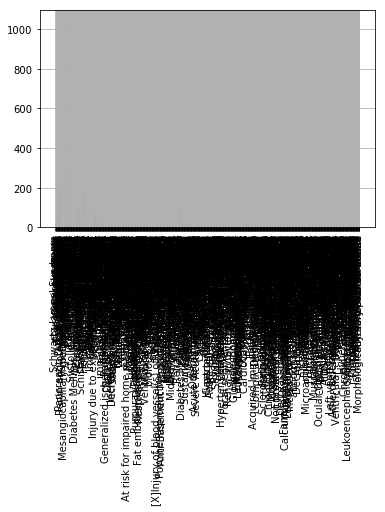

Counter({'Hypertensive disease': 1045, 'Systemic arterial pressure': 898, 'Hypertensive': 332, 'Heart failure': 311, 'Kidney Failure, Chronic': 233, 'Diabetic': 226, 'Systolic blood pressure': 205, 'Kidney Diseases': 199, 'Diabetic Nephropathy': 191, 'Diabetes': 178, 'Albuminuria': 174, 'Proteinuria': 165, 'Diabetes Mellitus, Non-Insulin-Dependent': 141, 'Adverse event': 133, 'Cardiovascular Diseases': 129, 'Myocardial Infarction': 117, 'Excretory function': 99, 'Injury': 92, 'Obesity': 91, 'Adverse effects': 87, 'Diabetes Mellitus': 84, 'Renal function': 82, 'Drug Kinetics': 82, 'Mean blood pressure': 81, 'Events': 76, 'Hypotension': 73, 'Insulin Resistance': 73, 'Atherosclerosis': 67, 'Fibrosis': 65, 'Disease': 64, 'Renin-angiotensin system inhibition': 63, 'Synthesis': 63, 'Ischemia': 63, 'Atrial Fibrillation': 62, 'End stage renal failure': 58, 'Angioneurotic Edema': 57, 'Cerebrovascular accident': 55, 'Complication': 55, 'Essential Hypertension': 54, 'Inflammation': 53, 'Metabolic

In [14]:
# find id for sysmptom
# 10500
id_sys = []
name_sys = []
for Utterance in root11.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
    id = Utterance.get('id')
    id_sys.append(id)
    name = Utterance.get('name')
    name_sys.append(name)
print(len(id_sys))

# draw histogram plot for its name
histo(name_sys)

# print outcome
counts = Counter(name_sys)
print(counts)

### Analysis based on aliskiren and sysptom on all 1202 paper

In [24]:
# find id for: aliskiren & symptom
alis_relsys_type = []
id_alis_relsys = []
id_relsys_alis = []
count = 0
for entity in root01.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)

count: 0 D30243307.E23 D30243307.E28
D30064425.E123 D30064425.E127
D29987919.E7 D29987919.E9
D29975120.E3 D29975120.E6
D29975120.E106 D29975120.E107
D29939645.E2 D29939645.E3
D29910050.E2 D29910050.E7
D29910050.E2 D29910050.E9
D29884545.E64 D29884545.E67
D29772435.E1 D29772435.E3
D29618841.E3 D29618841.E4
D29618841.E38 D29618841.E39
D29618841.E38 D29618841.E41
D29618841.E96 D29618841.E101
D29470612.E8 D29470612.E9
D29470612.E26 D29470612.E27
count: 100 D29331564.E98 D29331564.E104
D29230587.E4 D29230587.E2
D29198406.E2 D29198406.E6
D29198406.E15 D29198406.E17
D29184499.E1 D29184499.E2
D29184499.E1 D29184499.E8
D29184499.E16 D29184499.E20
D29184499.E107 D29184499.E109
D29179525.E29 D29179525.E36
D29172824.E1 D29172824.E7
D29172824.E39 D29172824.E41
D29172824.E57 D29172824.E52
D29152151.E1 D29152151.E2
D29152151.E9 D29152151.E11
D29152151.E20 D29152151.E21
D29152151.E74 D29152151.E76
D29069238.E75 D29069238.E76
D29069238.E92 D29069238.E96
count: 200 D29046730.E1 D29046730.E3
D29046730.E4

In [45]:
count = 0
for entity in root02.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
        
for entity in root03.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root04.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root05.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root06.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root07.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root08.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root09.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
    
for entity in root10.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root11.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)
            
for entity in root12.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            print(id_ali,id_sys)
            auxtype = pred.get('type')
            alis_relsys_type.append(auxtype)
            id_alis_relsys.append(id_sys)
            id_relsys_alis.append(id_ali)

count: 0 D27667116.E1 D27667116.E4
D27667116.E71 D27667116.E77
D27713608.E71 D27713608.E72
D27645307.E60 D27645307.E63
D27645307.E79 D27645307.E81
D27612855.E3 D27612855.E6
D27612855.E40 D27612855.E39
D27612855.E102 D27612855.E109
D27612855.E122 D27612855.E125
D27612855.E122 D27612855.E126
D27570581.E2 D27570581.E3
D27560625.E45 D27560625.E47
D27560625.E72 D27560625.E71
D27455575.E54 D27455575.E62
count: 100 D27343695.E78 D27343695.E90
D27343695.E82 D27343695.E88
D27322834.E2 D27322834.E5
D27180190.E3 D27180190.E5
D27180190.E20 D27180190.E21
D27180190.E29 D27180190.E32
D27154762.E1 D27154762.E4
D27154762.E91 D27154762.E85
D27154762.E94 D27154762.E95
D27118660.E70 D27118660.E72
D27118660.E88 D27118660.E92
D27094460.E2 D27094460.E5
D27094460.E10 D27094460.E11
D27094460.E69 D27094460.E70
D26988296.E20 D26988296.E21
D26988296.E46 D26988296.E43
D26988296.E46 D26988296.E44
count: 200 D26982530.E32 D26982530.E29
D26939623.E1 D26939623.E4
D26939623.E45 D26939623.E47
D26939623.E77 D26939623.E79

D22327564.E79 D22327564.E82
D22321062.E1 D22321062.E3
D22321062.E27 D22321062.E29
D22321062.E114 D22321062.E120
count: 1900 D22303910.E65 D22303910.E60
D22291836.E1 D22291836.E2
D22291836.E105 D22291836.E107
D22278138.E1 D22278138.E5
D22262304.E30 D22262304.E38
D22262304.E46 D22262304.E49
D22262304.E84 D22262304.E89
D22262304.E84 D22262304.E90
D22261625.E56 D22261625.E58
D22260457.E1 D22260457.E2
D22260457.E1 D22260457.E4
D22260457.E14 D22260457.E16
D22248199.E19 D22248199.E24
D22239623.E1 D22239623.E3
D22239623.E20 D22239623.E21
D22239623.E27 D22239623.E28
D22239623.E62 D22239623.E65
D22239623.E77 D22239623.E78
D23964439.E33 D23964439.E36
count: 2000 D22173856.E53 D22173856.E54
D22157325.E18 D22157325.E29
D22157325.E105 D22157325.E106
D22134386.E1 D22134386.E2
D22134386.E11 D22134386.E16
D22134386.E67 D22134386.E77
D22134386.E88 D22134386.E89
D22127400.E44 D22127400.E47
D22127400.E51 D22127400.E53
D22089535.E1 D22089535.E2
D22089535.E22 D22089535.E24
count: 2100 D22075749.E2 D22075749

D24253615.E21 D24253615.E25
D24253615.E88 D24253615.E89
D24204981.E54 D24204981.E55
D24204981.E54 D24204981.E56
D24204981.E54 D24204981.E57
D24165783.E47 D24165783.E46
D24154707.E116 D24154707.E118
D24152824.E25 D24152824.E28
D24144054.E45 D24144054.E44
D24144054.E51 D24144054.E48
D24144054.E58 D24144054.E55
D24144054.E103 D24144054.E105
D24143271.E52 D24143271.E55
D24143271.E52 D24143271.E57
D24143271.E94 D24143271.E98
D24140549.E84 D24140549.E76
D24139833.E28 D24139833.E31
D24117488.E50 D24117488.E56
D24117488.E77 D24117488.E92
D24060993.E32 D24060993.E28
D24041923.E3 D24041923.E6
D24041923.E10 D24041923.E11
count: 3800 D24008122.E16 D24008122.E24
D24008122.E94 D24008122.E98
D24006041.E4 D24006041.E6
D24006041.E12 D24006041.E13
D24006041.E74 D24006041.E79
D23999456.E2 D23999456.E9
D23999456.E145 D23999456.E148
D23997927.E41 D23997927.E44
D23926182.E36 D23926182.E38
D23926182.E36 D23926182.E39
D23922924.E1 D23922924.E4
D23922924.E13 D23922924.E15
D23894285.E30 D23894285.E28
count: 390

In [46]:
print(len(id_alis_relsys))

831


In [50]:
# find symptom names
name_alis_relsys = []
for id in id_alis_relsys:
    xpath_sysid = "./Document/Utterance/Entity[@id ='"+id+"']"
    for entity in root11.xpath(xpath_sysid):
        aux = entity.get('name')
        name_alis_relsys.append(aux)

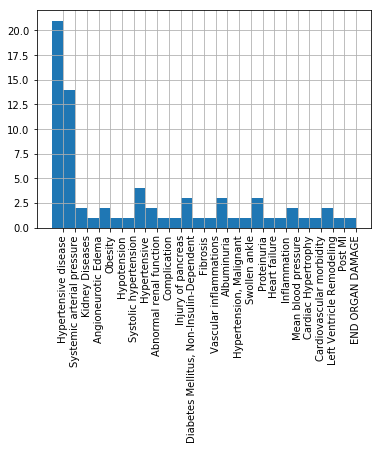

In [53]:
histo(name_alis_relsys)

In [54]:
print(name_alis_relsys)

['Hypertensive disease', 'Hypertensive disease', 'Systemic arterial pressure', 'Hypertensive disease', 'Kidney Diseases', 'Kidney Diseases', 'Hypertensive disease', 'Angioneurotic Edema', 'Obesity', 'Hypertensive disease', 'Hypertensive disease', 'Systemic arterial pressure', 'Systemic arterial pressure', 'Hypertensive disease', 'Hypotension', 'Systemic arterial pressure', 'Systolic hypertension', 'Hypertensive disease', 'Hypertensive', 'Abnormal renal function', 'Hypertensive', 'Abnormal renal function', 'Systemic arterial pressure', 'Systemic arterial pressure', 'Systemic arterial pressure', 'Complication', 'Injury of pancreas', 'Obesity', 'Diabetes Mellitus, Non-Insulin-Dependent', 'Fibrosis', 'Diabetes Mellitus, Non-Insulin-Dependent', 'Hypertensive disease', 'Vascular inflammations', 'Diabetes Mellitus, Non-Insulin-Dependent', 'Hypertensive disease', 'Albuminuria', 'Hypertensive', 'Hypertensive disease', 'Hypertension, Malignant', 'Systemic arterial pressure', 'Swollen ankle', 'Pr

### Ananlysis based on aliskiren and angioedema related 23 paper


In [109]:
# 23 paper
# find id for aliskiren
# 131
id_ali_23 = []
for Utterance in root33.xpath("//Utterance/Entity[@name='aliskiren']"):
    id = Utterance.get('id')
    id_ali_23.append(id)
print(len(id_ali_23))
# find id for drug
# 157
id_drug_23 = []
for Utterance in root33.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
    id = Utterance.get('id')
    id_drug_23.append(id)
print(len(id_drug_23))

131
157


In [93]:
# alis & rel_drug
# 0
alis_reldrug_type_23 = []
id_alis_reldrug_23 = []
id_reldrug_alis_23 = []
for entity in root33.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali_23 = entity.get('id')
    utterance = entity.getparent() 
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='orch,phsu' or @semtypes='clnd' or @semtypes='hops' or @semtypes='sbstt' or @semtypes='strd']"):
        id_drug_23 = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_drug_23,id_ali_23) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali_23,id_drug_23)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):    
            print(id_ali_23,id_drug_23)
            auxtype = pred.get('type')
            alis_reldrug_type_23.append(auxtype)
            id_alis_reldrug_23.append(id_drug_23)
            id_reldrug_alis_23.append(id_ali_23)

In [111]:
# alis&unrel_drug
# 26
id_unreldrug = list(set(id_drug_23)- set(id_ali))

In [114]:
# find unrel_drug_23 names
name_alis_unreldrug_23 = []
for id in id_unreldrug:
    xpath_druid = "./Document/Utterance/Entity[@id ='"+id+"']"
    for entity in root33.xpath(xpath_druid):
        aux = entity.get('name')
        name_alis_unreldrug_23.append(aux)

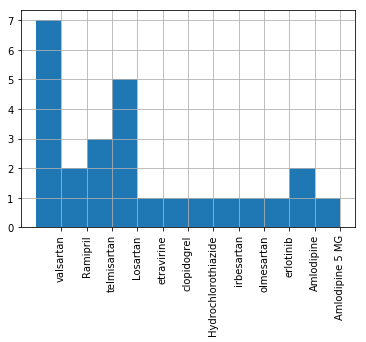

In [116]:
histo(name_alis_unreldrug_23)

221


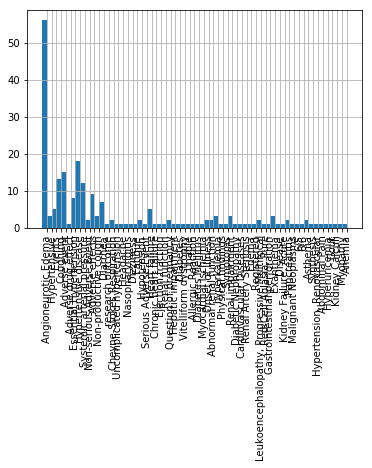

Counter({'Angioneurotic Edema': 56, 'Hypertensive disease': 18, 'Adverse event': 15, 'Coughing': 13, 'Systemic arterial pressure': 12, 'Adverse effects': 9, 'Essential Hypertension': 8, 'Diarrhea': 7, 'Events': 5, 'Heart failure': 5, 'Hypertensive': 3, 'Non-productive cough': 3, 'hyperkalemia': 3, 'Renal impairment': 3, 'Exanthema': 3, 'Non-serious Adverse Event': 2, 'Cheyne-Stokes Respiration': 2, 'Hypotension': 2, 'Question of pregnancy': 2, 'Onset of illness': 2, 'Abnormal renal function': 2, 'Leukoencephalopathy, Progressive Multifocal': 2, 'Pancreatitis': 2, 'Asthenia': 2, 'Adverse drug effect': 1, 'research outcome': 1, 'Uncomplicated hypertension': 1, 'Headache': 1, 'Nasopharyngitis': 1, 'Dizziness': 1, 'Fatigue': 1, 'Serious Adverse Event': 1, 'Chronic heart failure': 1, 'Ejection fraction': 1, 'Renal function': 1, 'Hepatic impairment': 1, 'Diabetes': 1, 'Vitelliform dystrophy': 1, 'Unable': 1, 'Allergic Reaction': 1, 'Diabetes Mellitus': 1, 'Myocardial Ischemia': 1, 'Physical 

In [117]:
# find id for symptom
# 10500
id_sys_33 = []
name_sys_33 = []
for Utterance in root33.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
    id = Utterance.get('id')
    id_sys_33.append(id)
    name = Utterance.get('name')
    name_sys_33.append(name)
print(len(id_sys_33))

# draw histogram plot for its name
histo(name_sys_33)

# print outcome
counts = Counter(name_sys_33)
print(counts)

In [118]:
# find id for: aliskiren & symptom
# 21
alis_relsys_type33 = []
id_alis_relsys33 = []
id_relsys_alis33 = []
count = 0
for entity in root33.xpath("//Utterance/Entity[@name='aliskiren']"):
    id_ali = entity.get('id')
    utterance = entity.getparent() 
    if count%100 == 0:
        print("count:",count,end=' ')
    count += 1
    for entity2 in utterance.xpath("//Utterance/Entity[@semtypes='sosy' or @semtypes='dsyn' or @semtypes='cgab' or @semtypes='anab' or @semtypes='evnt' or @semtypes='fndg' or @semtypes='inpo' or @semtypes='neop' or @semtypes='ortf' or @semtypes='patf' or @semtypes='phpr' or @semtypes='phsf']"):
        id_sys = entity2.get('id')
        xpath1 = "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_sys,id_ali) 
        xpath2= "//Predication/Subject[@entityID = '{0}']/..\
                  /Object[@entityID = '{1}']/../Predicate".format(id_ali,id_sys)
        for pred in utterance.xpath(xpath1 + " | " + xpath2):
            auxtype = pred.get('type')
            alis_relsys_type33.append(auxtype)
            id_alis_relsys33.append(id_sys)
            id_relsys_alis33.append(id_ali)

count: 0 count: 100 

In [119]:
# find symptom names
name_alis_relsys33 = []
for id in id_alis_relsys33:
    xpath_sysid = "./Document/Utterance/Entity[@id ='"+id+"']"
    for entity in root33.xpath(xpath_sysid):
        aux = entity.get('name')
        name_alis_relsys33.append(aux)

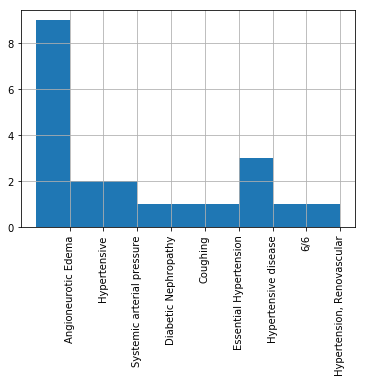

In [123]:
histo(name_alis_relsys33)